In [177]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sys.path.append('../../')
import Constants as c
import Utilities as utils

In [178]:

file_line = "calculate_metrics_h1_DT_combined_05_26_2020.csv"

df = pd.read_csv(file_line)

# len(df)

In [179]:
def hypothesisTest_Effort(model_records, model, task, pred, mean, sample_size):
    print("Hypothesis test for {0} and task = '{1}'".format(model, task))

    if task != "ALL":
        filter = model_records[model_records[c.TASK] == task]
        model_records = pd.concat([filter])
    
    filter1 = model_records[model_records[c.MODEL] == c.LINE]
    model_records = pd.concat([filter1]).sample(n=sample_size, random_state=0)

    num_records = len(model_records)
    model_records_mean = round(model_records[pred].mean(),2)

    print("Number of records: {0}".format(num_records))
    print("Sample mean: ", model_records_mean)
    
    alpha = 0.05
    is_gaussian = utils.gaussian_test(model_records[pred], alpha)

    if is_gaussian:
        if num_records <= 60:
            utils.one_sample_t_test(model_records[pred], mean, alpha)
        else:
            utils.one_sample_z_test(model_records[pred], mean, alpha)
    else:
        utils.one_sample_sign_test(model_records[pred], mean, alpha)

    plt.figure(figsize=(8,3))
    plt.tight_layout()
    sb.distplot(model_records[pred], kde=False)


In [180]:
task = "BUG"
sample_size = 60

Hypothesis test for Module and task = 'BUG'
Number of records: 60
Sample mean:  0.25
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  9.72296167189857e-11
One Sample Sign Test: 0.25 sample median is not likely to be greater than 0.53 (reject H0)


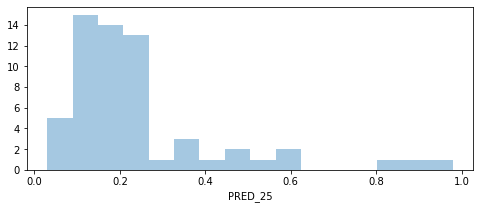

In [181]:
hypothesisTest_Effort(df.copy(), c.MODULE, task, c.PRED_25, 0.53, sample_size)

Hypothesis test for Module and task = 'BUG'
Number of records: 60
Sample mean:  0.35
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  3.1762786845135338e-15
One Sample Sign Test: 0.35 sample median is not likely to be greater than 0.87 (reject H0)


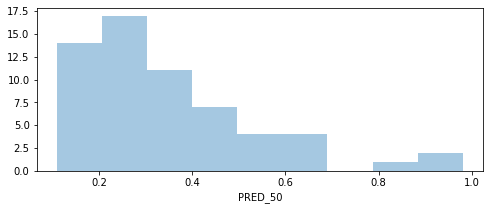

In [182]:
hypothesisTest_Effort(df.copy(), c.MODULE, task, c.PRED_50, 0.87, sample_size)

Hypothesis test for Line and task = 'BUG'
Number of records: 60
Sample mean:  0.25
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  3.1836287379335983e-06
One Sample Sign Test: 0.25 sample median is not likely to be greater than 0.33 (reject H0)


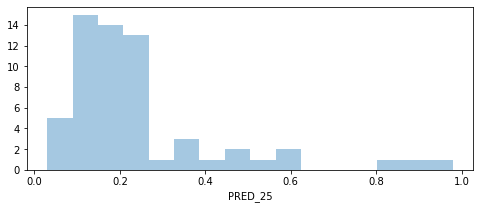

In [183]:
hypothesisTest_Effort(df.copy(), c.LINE, task, c.PRED_25, 0.33, sample_size)

Hypothesis test for Line and task = 'BUG'
Number of records: 60
Sample mean:  0.35
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  7.671918274276823e-10
One Sample Sign Test: 0.35 sample median is not likely to be greater than 0.6 (reject H0)


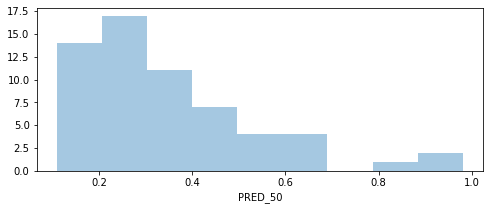

In [184]:
hypothesisTest_Effort(df.copy(), c.LINE, task, c.PRED_50, 0.60, sample_size)